# Lab | Imbalanced data

 ### 1. Load the dataset and explore the variables.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [5]:
# loading dataset into dataframe
data = pd.read_csv('customer_churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [17]:
# standardise column headers

data.columns = data.columns.str.lower()


In [6]:
# check data types - mostly categorical
data.dtypes.value_counts()

object     18
int64       2
float64     1
dtype: int64

In [18]:
# check data type per column

data.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [25]:
# tried to convert totalcharges to numerical format but doesn't seem to work. I tried removing the quotation marks but still didn't work. 
# i think it's not necessary for this exercise (we don't need this column) but how could i fix this for future cases?

data['totalcharges'] = data['totalcharges'].astype('float64')

ValueError: could not convert string to float: ''

In [26]:
# check for nulls in all columns
# we don't have any nulls so nothing to deal with here

for column in data:
    print (column ,':', data[column].isna().sum())

customerid : 0
gender : 0
seniorcitizen : 0
partner : 0
dependents : 0
tenure : 0
phoneservice : 0
multiplelines : 0
internetservice : 0
onlinesecurity : 0
onlinebackup : 0
deviceprotection : 0
techsupport : 0
streamingtv : 0
streamingmovies : 0
contract : 0
paperlessbilling : 0
paymentmethod : 0
monthlycharges : 0
totalcharges : 0
churn : 0


### 2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.

In [28]:
# churn is the target variable so let's check the balance of it
# heavily weighted towards no

data['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [30]:
# set customer id as index in case we want to check individual predictions after the model

data = data.set_index('customerid')
data

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
customerid,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


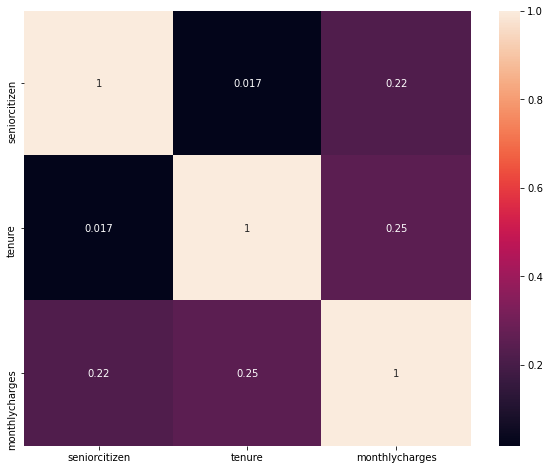

In [31]:
# check correlation
# no high multicollinearity so nothing to remove

corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

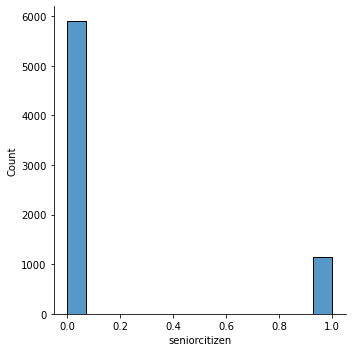

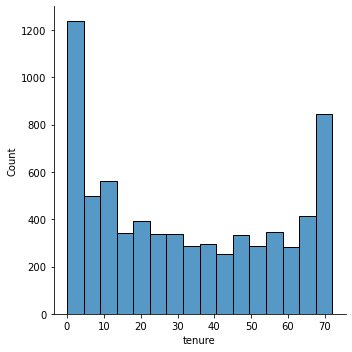

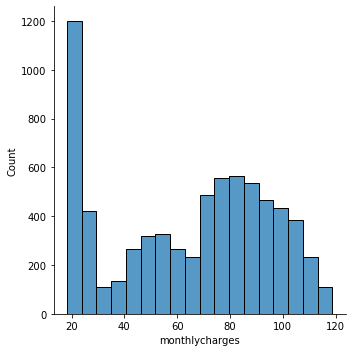

In [32]:
# check distribution of variables

for col in data.select_dtypes(np.number):
    sns.displot(data[col])
    plt.show()

### 3. Extract the target variable.

In [44]:
y = data['churn']

### 4. Extract the independent variables and scale them.

In [42]:
# transform senior citizen to object because there are only 2 values and the box cox didn't work with this column as a numerical
data['seniorcitizen'] = data['seniorcitizen'].astype('object')

In [43]:
# use box cox to normalise data as it is more skewed to the left
# is there a alternative approach which is better suited? like normalisation or log transform? not really sure which one to choose...

from scipy import stats

def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

df, _ci = boxcox_transform(data)
df

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
customerid,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,1.0,Yes,No,0.000000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,23.578295,29.85,No
5575-GNVDE,Male,1.0,No,No,8.796285,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,43.571734,1889.5,No
3668-QPYBK,Male,1.0,No,No,0.815814,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,41.332735,108.15,Yes
7795-CFOCW,Male,1.0,No,No,10.300457,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),32.892530,1840.75,No
9237-HQITU,Female,1.0,No,No,0.815814,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,53.391036,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,1.0,Yes,Yes,7.177193,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,63.300009,1990.5,No
2234-XADUH,Female,1.0,Yes,Yes,13.299215,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),76.033726,7362.9,No
4801-JZAZL,Female,1.0,Yes,Yes,4.364654,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.388387,346.45,No


In [45]:
# extracting independant variables
# scaling not necessary as already scaled with box cox

X = data[['tenure','seniorcitizen','monthlycharges']]
X

,tenure,seniorcitizen,monthlycharges
customerid,,,
7590-VHVEG,0.000000,1.0,23.578295
5575-GNVDE,8.796285,1.0,43.571734
3668-QPYBK,0.815814,1.0,41.332735
7795-CFOCW,10.300457,1.0,32.892530
9237-HQITU,0.815814,1.0,53.391036
...,...,...,...
6840-RESVB,7.177193,1.0,63.300009
2234-XADUH,13.299215,1.0,76.033726
4801-JZAZL,4.364654,1.0,23.388387


In [46]:
# encode categoricals )just the senrio citizen column

X = pd.get_dummies(X)
X

,tenure,monthlycharges,seniorcitizen_1.0
customerid,,,
7590-VHVEG,0.000000,23.578295,1
5575-GNVDE,8.796285,43.571734,1
3668-QPYBK,0.815814,41.332735,1
7795-CFOCW,10.300457,32.892530,1
9237-HQITU,0.815814,53.391036,1
...,...,...,...
6840-RESVB,7.177193,63.300009,1
2234-XADUH,13.299215,76.033726,1
4801-JZAZL,4.364654,23.388387,1


### 5. Build the logistic regression model.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

### 6. Evaluate the model.

In [49]:
classification.score(X_test, y_test)

0.7955997161107168

In [50]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[951,  85],
       [203, 170]])

<AxesSubplot:>

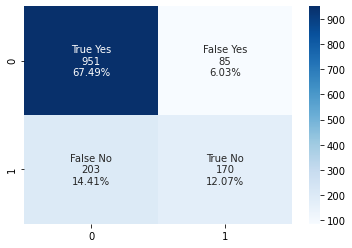

In [51]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True Yes', 'False Yes', 'False No', 'True No']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')



### 7. Even a simple model will give us more than 70% accuracy. Why?

In [ ]:
# I think because of the data imbalance 
# 73% of the data is in 1 class - so the model will learn to predict around 70% into this class?

### 8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [57]:
# apply SMOTE technique to data

from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_smoted = data[['tenure','seniorcitizen','monthlycharges']]

y_smoted = data['churn']

X_sm, y_sm = smote.fit_resample(X_smoted, y_smoted)
y_sm.value_counts()

Yes    5174
No     5174
Name: churn, dtype: int64

In [59]:
# encode smoted categorical columns
X_sm = pd.get_dummies(X_sm)
X_sm

,tenure,monthlycharges,seniorcitizen_1.0
0,0.000000,23.578295,1
1,8.796285,43.571734,1
2,0.815814,41.332735,1
3,10.300457,32.892530,1
4,0.815814,53.391036,1
...,...,...,...
10343,0.815814,38.198305,1
10344,6.439889,69.768102,1
10345,2.379830,35.740468,1
10346,0.815814,53.376990,1


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [61]:
# apply model to new data after using SMOTE method

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [62]:
# classification score is slightly lower
classification.score(X_test, y_test)

0.7410628019323672

In [63]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[752, 269],
       [267, 782]])

<AxesSubplot:>

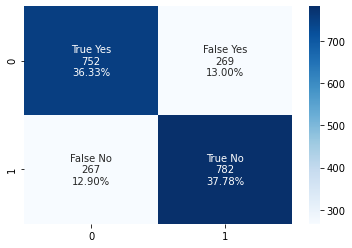

In [64]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True Yes', 'False Yes', 'False No', 'True No']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# accuracy score is lower but the model does a much better job in predicting true negatives correctly (which is the minority class)

### 9. Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply `imblearn.under_sampling.TomekLinks` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [65]:
from imblearn.under_sampling import TomekLinks

X_tomek = data[['tenure','seniorcitizen','monthlycharges']]
y_tomek = data['churn']

tomek = TomekLinks()
X_tl, y_tl = tomek.fit_resample(X, y)
y_tl.value_counts()

No     4707
Yes    1869
Name: churn, dtype: int64

In [66]:
# encode tomked categorical columns
X_tl = pd.get_dummies(X_tl)
X_tl

,tenure,monthlycharges,seniorcitizen_1.0
0,0.000000,23.578295,1
1,8.796285,43.571734,1
2,0.815814,41.332735,1
3,10.300457,32.892530,1
4,0.815814,53.391036,1
...,...,...,...
6571,13.299215,16.884008,1
6572,7.177193,63.300009,1
6573,4.364654,23.388387,1
6574,1.936485,56.005603,1


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=42)

In [68]:
# apply model to new data after using tomek links method

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [69]:
# classification score higher then SMOTE but slightly lower than without doing any changes to the sampling

classification.score(X_test, y_test)

0.7887537993920972

In [70]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[853,  68],
       [210, 185]])

<AxesSubplot:>

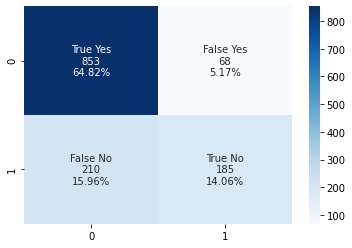

In [71]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True Yes', 'False Yes', 'False No', 'True No']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# seems like the model didn't perform well on the minority class compared to the SMOTE method. still a bit better than the first run
# maybe should have undersampled the majority class first and then used the tomek links method? the majority class still hugely outweighted the minority class before we trained the model

In [ ]:
# not sure if my interpretations of the results are correct...